In [2]:
import sys
import os
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Get the current working directory
current_dir = os.getcwd()

# Assuming your notebook is in the 'feature_engin' directory,
# and you want to add 'main' to the path
main_dir = os.path.dirname(current_dir)
sys.path.append(main_dir)

from feature_engin.main_feature_engin import merge_all_datasets

data = merge_all_datasets()


Loaded germany_electricity_generation_2018-2023.csv successfully.
Loaded weather_north_hourly.csv successfully.
Loaded weather_south_hourly.csv successfully.
Loaded weather_brocken_hourly.csv successfully.
Loaded holidays.csv successfully.
Loaded PMI_germany.csv successfully.
Loaded coal_price.csv successfully.
Loaded ttf_price.csv successfully.
Loaded oil_price.csv successfully.
The DataFrame has 207264 rows before deleting NaN rows.
The DataFrame has 207164 rows AFTER deleting NaN rows.


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207164 entries, 2018-01-02 00:00:00+00:00 to 2023-11-29 10:45:00+00:00
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fractional_hour         207164 non-null  float64
 1   day_of_week             207164 non-null  float64
 2   week_of_year            207164 non-null  float64
 3   month                   207164 non-null  float64
 4   year                    207164 non-null  float64
 5   hydro_storage_in        207164 non-null  float64
 6   cross_border            207164 non-null  float64
 7   nuclear                 207164 non-null  float64
 8   hydro                   207164 non-null  float64
 9   biomass                 207164 non-null  float64
 10  lignite                 207164 non-null  float64
 11  hard_coal               207164 non-null  float64
 12  oil                     207164 non-null  float64
 13  coal_gas                2071

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select 50% of the data randomly
subset = data.sample(frac=0.5)


In [23]:
# Instantiate the model
knn = KNeighborsRegressor()

# Prepare your feature set and target variable
X = subset.drop(columns=['day_ahead_price'])
y = subset['day_ahead_price']

X.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103582 entries, 2020-03-31 14:45:00+00:00 to 2018-05-04 07:30:00+00:00
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   fractional_hour         103582 non-null  float64
 1   day_of_week             103582 non-null  float64
 2   week_of_year            103582 non-null  float64
 3   month                   103582 non-null  float64
 4   year                    103582 non-null  float64
 5   hydro_storage_in        103582 non-null  float64
 6   cross_border            103582 non-null  float64
 7   nuclear                 103582 non-null  float64
 8   hydro                   103582 non-null  float64
 9   biomass                 103582 non-null  float64
 10  lignite                 103582 non-null  float64
 11  hard_coal               103582 non-null  float64
 12  oil                     103582 non-null  float64
 13  coal_gas                1035

In [24]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use cross-validation to evaluate the model
base_knn_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='r2'))

print("Base KNN R2 Score:", base_knn_score)


Base KNN R2 Score: 0.9758437989534767


In [25]:
score = []
neighbours = []

for k in range(1,15):

    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_train, y_train)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)


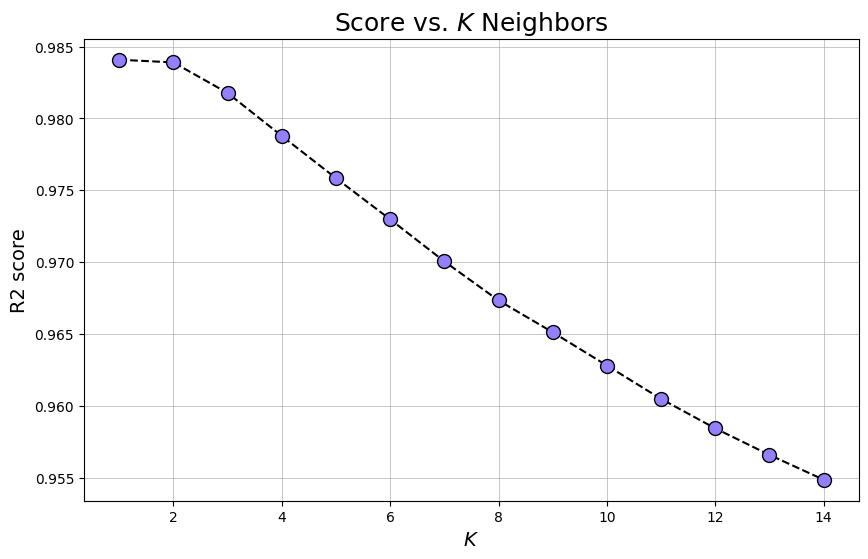

In [44]:
# Plot the evolution of the score below

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(neighbours,score,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

    plt.show()


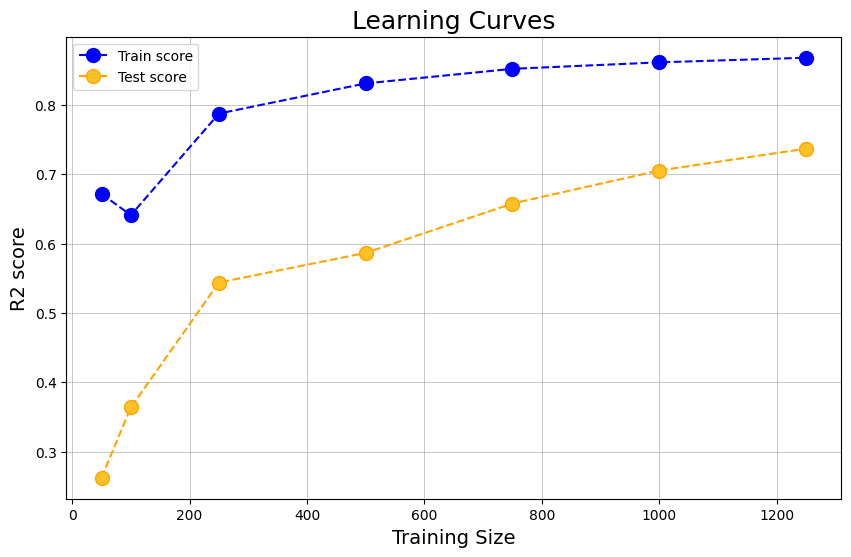

In [29]:
# Plot the learning curves!
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=3),
                                                              X = X_train,
                                                              y = y_train,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import numpy as np

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=3),
                                                              X = X_train,
                                                              y = y_train,
                                                              train_sizes = [50,100,250,500,750,1000,1250],
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


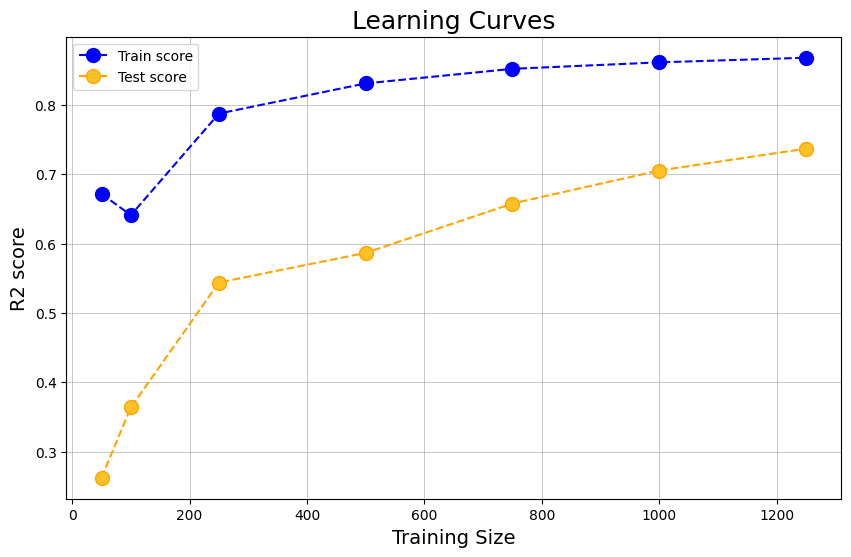

In [31]:
# Plot the learning curves

import matplotlib.pyplot as plt

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")

    plt.show()


In [33]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=3), X_train, y_train, scoring = 'neg_mean_absolute_error')

price_error = cv_results['test_score'].mean()

price_error


-0.0572534175578152

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Using the KNeighborsRegressor model (knn) and the training data (X_train, y_train)
mse_scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

print(mse_scores)

# Calculating the average RMSE
average_rmse = np.mean(mse_scores)

print("Average RMSE:", average_rmse)


[0.1268824  0.13629533 0.13260206 0.13255696 0.13922156]
Average RMSE: 0.13351166306582887


In [41]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() # Instanciate Linear Regression

cv_results_linear = cross_validate(lin_model, X_train, y_train, scoring = 'neg_mean_absolute_error') # Cross validate

linear_model_score = cv_results_linear['test_score'].mean()  # Mean of scores

print(linear_model_score)


-0.30180143535554144


In [45]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# check cross-correlation with target
corr_matrix["day_ahead_price"].abs().sort_values()

# Calculate the absolute correlation with the target variable
target_corr = corr_matrix["day_ahead_price"].abs()

# Filter out features with correlation less than 0.1
selected_features = target_corr[target_corr >= 0.1].index.tolist()


# Create a new dataset with the selected features
filtered_data = data[selected_features]

filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207164 entries, 2018-01-02 00:00:00+00:00 to 2023-11-29 10:45:00+00:00
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   day_of_week           207164 non-null  float64
 1   week_of_year          207164 non-null  float64
 2   month                 207164 non-null  float64
 3   year                  207164 non-null  float64
 4   hydro_storage_in      207164 non-null  float64
 5   cross_border          207164 non-null  float64
 6   nuclear               207164 non-null  float64
 7   hydro                 207164 non-null  float64
 8   biomass               207164 non-null  float64
 9   lignite               207164 non-null  float64
 10  hard_coal             207164 non-null  float64
 11  oil                   207164 non-null  float64
 12  coal_gas              207164 non-null  float64
 13  nat_gas               207164 non-null  float64
 14  hydro_

In [46]:
# Instantiate the model
knn_red_feat = KNeighborsRegressor()

# Select 50% of the data randomly
subset_red = filtered_data.sample(frac=0.7)


# Prepare your feature set and target variable
X_red = subset_red.drop(columns=['day_ahead_price'])
y_red = subset_red['day_ahead_price']


# Split the data into training and test sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


In [47]:
# Use cross-validation to evaluate the model
base_knn_score_red = np.mean(cross_val_score(knn_red_feat, X_red_train, y_red_train, cv=5, scoring='r2'))

print("Base KNN R2 Score:", base_knn_score)


Base KNN R2 Score: 0.9758437989534767
